# Open Rice

**1)** We scraped a data set from Openrice but it needs cleaning:

* Remove duplicate data
* Use a regex to clean the review col
* Remove the trailing commas from the adress col


In [62]:
import pandas as pd


In [63]:
openrice = pd.read_csv("/Users/joycechung/Downloads/Regex/data/open-rice.csv")

In [64]:
openrice

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100
...,...,...,...,...,...,...,...,...
26160,"Rooftop, Courtyard By Marriott Hong Kong Sha T...",2770,0,International,33,LEVELthirty Lounge & Bar,(44 Reviews),$101-200
26161,"6/F, Yuen Long Landmark,",3374,18,International,59,The West 西宮,(113 Reviews),$201-400
26162,"2-3/F, Chau Hop Shing Building, 2- 8 Chung On ...",1192,28,International,122,Satay King 沙嗲王,(232 Reviews),$51-100
26163,"G/F, 9-13 Fuk Sau Lane, Sai Ying Pun,",5927,6,International,37,Locofama,(50 Reviews),$101-200


In [65]:
openrice.count()

address              26165
bookmarks            26165
dislikes             26165
food_type            26165
likes                26165
name                 26165
number_of_reviews    26165
price_range          26165
dtype: int64

In [66]:
import pandas as pd
len(openrice['name'].unique())

11011

In [67]:
#Removing dataframe rows where 'name' is duplicated
openrice = openrice.drop_duplicates(subset=['name'])

In [68]:
#Use a regex to clean the review col
#only keeping the numbers 
#delete : (, Reviews, )
import re 

def extract_reviews(col_val):
    all_chars = re.findall(r"\d", col_val)
    return ''.join(all_chars)
    #The function extract_reviews now joins all the extracted digits using ''.join(all_chars) 
    #and returns the resulting string.

openrice["reviews_cleaned"] = openrice["number_of_reviews"].apply(extract_reviews)

/var/folders/qb/h6wfsqy5125c1m04_b953jz40000gn/T/ipykernel_3977/2899848315.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openrice["reviews_cleaned"] = openrice["number_of_reviews"].apply(extract_reviews)


In [69]:
#Remove the trailing commas from the address col
def remove_commas(col_val):
    cleaned_val = re.sub(r",$", '', col_val)
    return cleaned_val
    #The function extract_reviews now joins all the extracted digits using ''.join(all_chars) 
    #and returns the resulting string.

openrice["address_cleaned"] = openrice["address"].apply(remove_commas)

/var/folders/qb/h6wfsqy5125c1m04_b953jz40000gn/T/ipykernel_3977/1905204240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openrice["address_cleaned"] = openrice["address"].apply(remove_commas)


In [86]:
openrice

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,reviews_cleaned,address_cleaned,price_range_num
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50,133,"Shop J-K., 200 Hollywood Road",1
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400,30,"G/F, 108 Hollywood Road",4
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400,43,"G/F, 206 Hollywood Road",4
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50,39,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100,57,"G/F, 38 Queens Road West",2
...,...,...,...,...,...,...,...,...,...,...,...
26017,"G/F, 17 Hak Po Street,",539,4,Spanish,31,De Luna Tapas Bar & Restaurant,(44 Reviews),$201-400,44,"G/F, 17 Hak Po Street",4
26046,"1/F, Shun Ho Tower, 24-30 Ice House Street,,",6334,5,Spanish,91,Ole Spanish Restaurant,(116 Reviews),$401-800,116,"1/F, Shun Ho Tower, 24-30 Ice House Street,",5
26132,"Shop 601, L6, FoodLoft, Mira Place One, 132 N...",2136,6,International,61,My Day,(84 Reviews),$201-400,84,"Shop 601, L6, FoodLoft, Mira Place One, 132 N...",4
26141,"Shop 208, 1881 Heritage, 2A Canton Road,",3101,2,International,26,Van Gogh Senses,(33 Reviews),$201-400,33,"Shop 208, 1881 Heritage, 2A Canton Road",4


**2.)** Which restaurant in Hong Kong is the most favorable? In terms of likes, in terms of bookmarks?

In [109]:
#Max likes 
openrice[openrice.likes == openrice.likes.max()]['name']

569    Australia Dairy Company 澳洲牛奶公司
Name: name, dtype: object

In [111]:
#Max bookmarks 
openrice[openrice.bookmarks == openrice.bookmarks.max()]['name']

233    The Place
Name: name, dtype: object

**3.)** What is the price range for the whole open rice dataset?

In [76]:
openrice['price_range'].unique()

array(['Below $50', '$201-400', '$51-100', '$101-200', '$401-800',
       'Above $801'], dtype=object)

In [ ]:
#Assigning numerical values to the price_ranges to get the min & max ranges

# Create a mapping dictionary for price ranges
price_range_mapping = {
    'Below $50': 1,
    '$51-100': 2,
    '$101-200': 3,
    '$201-400': 4,
    '$401-800': 5,
    'Above $801': 6
}

# Assign numerical values to the 'price_range' column
openrice['price_range_num'] = openrice['price_range'].map(price_range_mapping)

In [84]:
#Min price range
openrice[openrice.price_range_num == openrice.price_range_num.min()]['price_range'].unique()

array(['Below $50'], dtype=object)

In [85]:
#Max price range
openrice[openrice.price_range_num == openrice.price_range_num.max()]['price_range'].unique()

array(['Above $801'], dtype=object)

**4.)** By grouping price_range with mean and median, what can you observe from bookmarks and likes?


#the results of the mean and median of bookmarks and likes in the whole dataframe corresponds most closely to the price range of '$51-200'. 

In [100]:
#Finding the mean price range
desired_mean = round(openrice['price_range_num'].mean()) #rounded to the nearest whole number
price_range_unique = openrice.loc[openrice['price_range_num'] == desired_mean, 'price_range'].unique()
#The loc function is used to select rows where 'price_range_num' is equal to desired_mean.
print(price_range_unique)

['$51-100']


In [91]:
#Finding the median price_range 
openrice[openrice.price_range_num == openrice.price_range_num.median()]['price_range'].unique()

array(['$51-100'], dtype=object)

In [129]:
openrice['bookmarks'].mean()

1409.0856416310962

In [118]:
mean_bookmarks = openrice.groupby('price_range')['bookmarks'].mean()
print(mean_bookmarks)

price_range
$101-200      2017.456737
$201-400      3164.735833
$401-800      4202.273616
$51-100       1111.340086
Above $801    3859.130435
Below $50      590.380328
Name: bookmarks, dtype: float64


In [128]:
openrice['bookmarks'].median()

314.0

In [120]:
median_bookmarks = openrice.groupby('price_range')['bookmarks'].median()
print(median_bookmarks)

price_range
$101-200       768.0
$201-400      1587.0
$401-800      2209.0
$51-100        293.0
Above $801    2768.5
Below $50       95.0
Name: bookmarks, dtype: float64


In [126]:
openrice['likes'].mean()

31.42521115248388

In [124]:
#Mean likes 

mean_likes = openrice.groupby('price_range')['likes'].mean()
print(mean_likes)

price_range
$101-200      45.568661
$201-400      61.307759
$401-800      56.827362
$51-100       27.492014
Above $801    54.456522
Below $50     16.791038
Name: likes, dtype: float64


In [130]:
openrice['likes'].median()

10.0

In [123]:
median_likes = openrice.groupby('price_range')['likes'].median()
print(median_likes)

price_range
$101-200      19.0
$201-400      30.0
$401-800      35.0
$51-100        9.0
Above $801    22.5
Below $50      5.0
Name: likes, dtype: float64


There's too many restaurants types, this can hinder the analysis. Let's make a new column for HK Style Resturants.

In [131]:
openrice['HK Style Restaurants'] = openrice['food_type'] == 'Hong Kong Style'

/var/folders/qb/h6wfsqy5125c1m04_b953jz40000gn/T/ipykernel_3977/474021108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openrice['HK Style Restaurants'] = openrice['food_type'] == 'Hong Kong Style'


In [132]:
openrice

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,reviews_cleaned,address_cleaned,price_range_num,HK Style Restaurants
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50,133,"Shop J-K., 200 Hollywood Road",1,True
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400,30,"G/F, 108 Hollywood Road",4,False
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400,43,"G/F, 206 Hollywood Road",4,False
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50,39,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1,True
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100,57,"G/F, 38 Queens Road West",2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26017,"G/F, 17 Hak Po Street,",539,4,Spanish,31,De Luna Tapas Bar & Restaurant,(44 Reviews),$201-400,44,"G/F, 17 Hak Po Street",4,False
26046,"1/F, Shun Ho Tower, 24-30 Ice House Street,,",6334,5,Spanish,91,Ole Spanish Restaurant,(116 Reviews),$401-800,116,"1/F, Shun Ho Tower, 24-30 Ice House Street,",5,False
26132,"Shop 601, L6, FoodLoft, Mira Place One, 132 N...",2136,6,International,61,My Day,(84 Reviews),$201-400,84,"Shop 601, L6, FoodLoft, Mira Place One, 132 N...",4,False
26141,"Shop 208, 1881 Heritage, 2A Canton Road,",3101,2,International,26,Van Gogh Senses,(33 Reviews),$201-400,33,"Shop 208, 1881 Heritage, 2A Canton Road",4,False


**5.)** Select price_range, likes, bookmarks,  HKresturant as a new dataframe.

In [133]:
new_df = openrice[['price_range', 'likes', 'bookmarks', 'HK Style Restaurants']].copy()

In [134]:
new_df

,price_range,likes,bookmarks,HK Style Restaurants
0,Below $50,78,5838,True
1,$201-400,20,3492,False
2,$201-400,31,5517,False
3,Below $50,23,1173,True
4,$51-100,50,1064,False
...,...,...,...,...
26017,$201-400,31,539,False
26046,$401-800,91,6334,False
26132,$201-400,61,2136,False
26141,$201-400,26,3101,False


**6.)** Use your new dataframe to make box plot and violin plots.

<Axes: ylabel='price_range'>

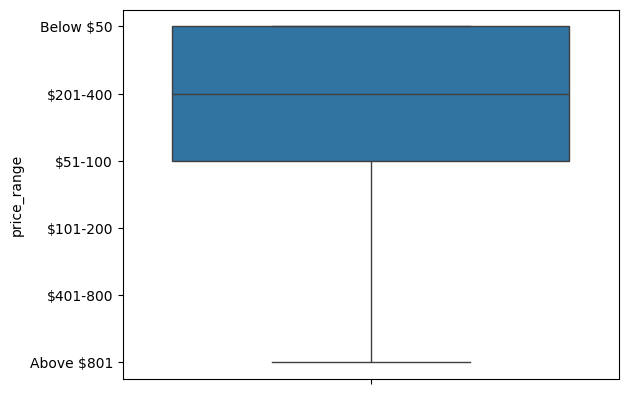

In [141]:
#Boxplot 
import seaborn as sns
sns.boxplot(y=new_df["price_range"])

<Axes: xlabel='price_range', ylabel='bookmarks'>

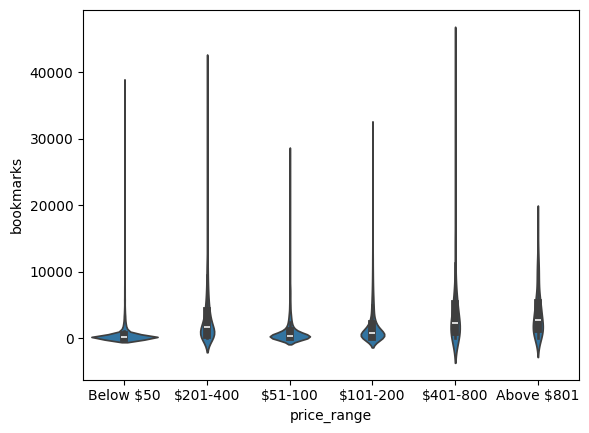

In [151]:
#Violin plot 
import seaborn as sns
sns.violinplot(x=new_df["price_range"], y=new_df["bookmarks"])

In [ ]:
When you should use a violin plot
Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group’s density curve can be compared to see where groups are similar or different. 

# Unicef Data

When working with data we may aberiviate the columns names to make them simpler to type. However we need to be able to change them back.


In [152]:
import pandas as pd

In [154]:
unicef = pd.read_csv("/Users/joycechung/Downloads/mn.csv")

/var/folders/qb/h6wfsqy5125c1m04_b953jz40000gn/T/ipykernel_3977/310012291.py:1: DtypeWarning: Columns (110,111,112,120) have mixed types. Specify dtype option on import or set low_memory=False.
  unicef = pd.read_csv("/Users/joycechung/Downloads/mn.csv")


In [155]:
unicef.head()

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


 **1.)** Drop the unnamed column

In [ ]:
unicef = unicef.drop('Unnamed: 0', axis=1)

**2.)** Use the data in `header_df` to replace the `Name` with it's `Label` in the original dataframe.

In [161]:
unicef_header = pd.read_csv("/Users/joycechung/Downloads/mn_headers.csv")

In [162]:
unicef_header.head()

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN


In [166]:
mapping_dict = dict(unicef_header[['Name', 'Label']].values)
unicef.rename(columns=mapping_dict, inplace=True)

In [167]:
unicef

,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,Year of interview,...,Children surviving,Children dead,mwelevel,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,682,20,2,682,20,2,913,11,3,2014,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9004,682,20,3,682,20,3,918,10,3,2014,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9005,682,21,2,682,21,2,913,13,3,2014,...,0.0,0.0,Secondary,0.817528,0.712168,4,-1.436591,1.0,NaN,NaN
9006,682,23,1,682,23,1,913,9,3,2014,...,0.0,0.0,Secondary,0.817528,0.847591,4,-1.025058,1.0,NaN,NaN


# Ricacorp

**1.)** Reading in the file. *Hint*  What type of format is it? Also, you'll need to change the encoding to 'utf-16'

In [244]:
import pandas as pd

In [245]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [246]:
import chardet 

with open('/Users/joycechung/Downloads/APIs/data/ricacorp-real-estate-sales.tsv', 'rb') as f:

    result = chardet.detect(f.read())

    df = pd.read_csv('/Users/joycechung/Downloads/APIs/data/ricacorp-real-estate-sales.tsv', encoding=result['encoding'], sep='\t')
    # Use '\t' as the separator for tab-separated values (.tsv)

In [247]:
df

,Area,web-scraper-order,web-scraper-start-url,pagination,pagination-href,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,1521007907-3932,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,1521007147-2665,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,1521006995-2269,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,1521008121-4522,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,1521006897-2016,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,New Territories West,1521010950-9040,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Famous Property, Greenery Mountain View",Medium Floor Zone (Flat C) ...,4.20,Rent $11k\n ...,Area :\n329Ft ($12.7k/Ft),Tsing Yi Flat C Block 5 Mayfair Gardens Mediu...,Last Updated : 28-02-2018,Pay/M︰$15.5k,Loan%︰70%,1st Pay︰$1.26M
10005,New Territories West,1521012251-10812,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Nice Decoration, Good Layout & Efficient",Low Floor Zone (Flat B) ...,7.60,NaN,Area :\n696Ft ($10.9k/Ft),Yuen Long Flat B Helorus Boulevard Tower 6B Ri...,Last Updated : 01-03-2018,Pay/M︰$24.1k,Loan%︰60%,1st Pay︰$3.04M
10006,New Territories West,1521011449-9805,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Prestige Location, Invite Offers",High Floor Zone (Flat A) ...,6.40,Rent $15k\n ...,Area :\n443Ft ($14.4k/Ft),Yuen Long Flat A Block M2 Phase 2 Yoho Midtown...,Last Updated : 07-03-2018,Pay/M︰$22.2k,Loan%︰65%,1st Pay︰$2.2M
10007,New Territories West,1521012542-11661,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/r~s~...,"Rare Offer, Quiet & Boutique Living",High Floor Zone (Flat 1) ...,16.50,NaN,Area :\n826Ft ($19.9k/Ft),Heng Fa Chuen Flat 1 Block 49 Heng Fa Chuen H...,Last Updated : 13-03-2018,Pay/M︰$43.7k,Loan%︰50%,1st Pay︰$8.25M


**2.)** Remove the useless columns like web-scraper-order, pagination etc.

In [248]:
df = df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'pagination', 'pagination-href'])

In [249]:
df

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M
...,...,...,...,...,...,...,...,...,...,...,...
10004,New Territories West,"Famous Property, Greenery Mountain View",Medium Floor Zone (Flat C) ...,4.20,Rent $11k\n ...,Area :\n329Ft ($12.7k/Ft),Tsing Yi Flat C Block 5 Mayfair Gardens Mediu...,Last Updated : 28-02-2018,Pay/M︰$15.5k,Loan%︰70%,1st Pay︰$1.26M
10005,New Territories West,"Nice Decoration, Good Layout & Efficient",Low Floor Zone (Flat B) ...,7.60,NaN,Area :\n696Ft ($10.9k/Ft),Yuen Long Flat B Helorus Boulevard Tower 6B Ri...,Last Updated : 01-03-2018,Pay/M︰$24.1k,Loan%︰60%,1st Pay︰$3.04M
10006,New Territories West,"Prestige Location, Invite Offers",High Floor Zone (Flat A) ...,6.40,Rent $15k\n ...,Area :\n443Ft ($14.4k/Ft),Yuen Long Flat A Block M2 Phase 2 Yoho Midtown...,Last Updated : 07-03-2018,Pay/M︰$22.2k,Loan%︰65%,1st Pay︰$2.2M
10007,New Territories West,"Rare Offer, Quiet & Boutique Living",High Floor Zone (Flat 1) ...,16.50,NaN,Area :\n826Ft ($19.9k/Ft),Heng Fa Chuen Flat 1 Block 49 Heng Fa Chuen H...,Last Updated : 13-03-2018,Pay/M︰$43.7k,Loan%︰50%,1st Pay︰$8.25M


**3.)** *Bonus* - In columns that should be numerical, use regular expressions to get the numbers and convert the columns from strings to numerical.

In [252]:
import re 

In [260]:
# 'rent hkd'
# converting null values to 0 in vector format:
df["rent hkd"] = df["rent hkd"].apply(lambda x: "$0/" if isinstance(x, float) 
                                                                else ("$0" if len(x.split("\n")) == 1 
                                                                             else x.split("\n")[0]))

#if it's an instance of float, return 0
#otherwise see if it's legnth with 1 or not
#if it's length with 1, then it's the "premium" statement. turn it to 0
#if it splits with 1 value, then we are adding it to "rent" 



#output: whenever there is NaN, we will replace it with $0. 

In [261]:
# 'pay per month'
# strip Pay/M: ,$, k 

def extract_first_number(col_val):
    all_numbers = re.findall(r'\d+[k]?', col_val) 
    return convert_str_to_num(all_numbers[0])

In [262]:
def convert_str_to_num(str_num):
    try:
        return float(str_num)
    except:
        return float(str_num[:-1]) * 1000

In [263]:
extract_first_number("Rent $11k\n")

11000.0

In [ ]:
df["rent hkd"] = df["rent hkd"].apply(extract_first_number)

In [295]:
# '1st payment'
# strip 1st Pay︰, $,M
import re

def remove_prefix_and_dollar(col_val):
    cleaned_string = re.sub(r'\|*1st Pay︰\|*|\$|M', '', col_val)
    return cleaned_string

In [297]:
remove_prefix_and_dollar("1st Pay︰$3M")

'3'

In [300]:
df["1st payment_millions"] = df["1st payment"].apply(remove_prefix_and_dollar)

In [328]:
#pay per month 
import re 
def remove_pay_M(col_val):
    all_numbers = re.sub(r'\|*Pay\/M︰\|*|\$|k', '', col_val)
    return all_numbers

In [ ]:
remove_pay_M("Pay/M︰$70.2k")

In [ ]:
df["pay per month in thousands"] = df["pay per month"].apply(remove_pay_M)

In [ ]:
df = df.drop(["pay per month"], axis=1)

In [268]:
ricacorp.head()

NameError: name 'ricacorp' is not defined

In [ ]:
ricacorp.to_csv("data/ricacorp-clean.csv")